In [1]:
batch_size = 16

In [2]:
from PIL import Image

def save_image(image, path):
    # Convert the image array to PIL Image
    image = (image * 255).astype(np.uint8)  # Convert values back to 0-255 range
    image = Image.fromarray(image)

    # Save the image as PNG
    image.save(path)

Found 613 images belonging to 4 classes.


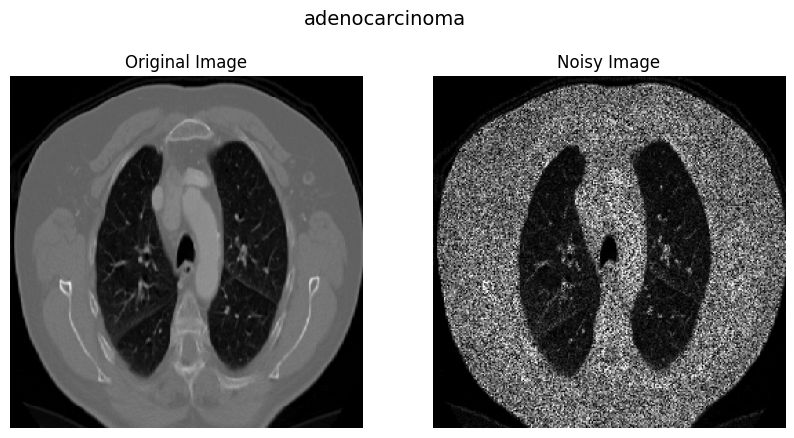

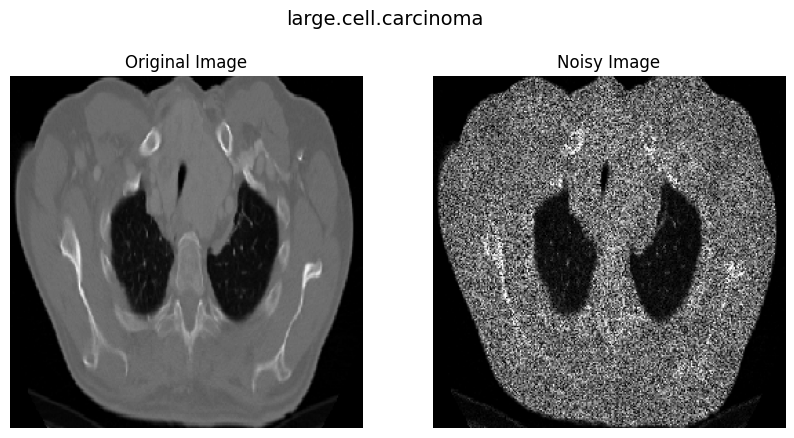

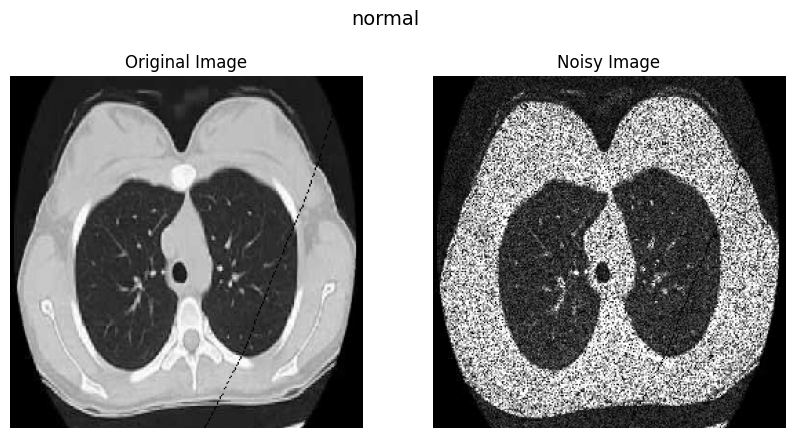

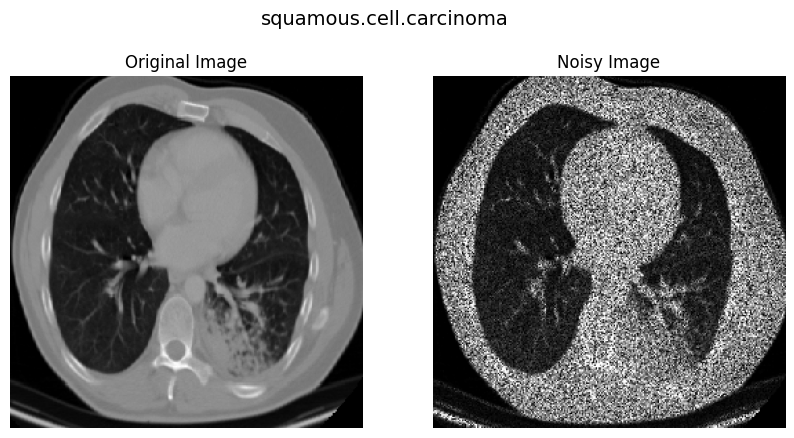

In [3]:
import os
import numpy as np
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Create an instance of the ImageDataGenerator
datagen = ImageDataGenerator()

# Set the directory to save the noisy images
noisy_image_dir = "E:/DL"  # Replace with your desired directory path
os.makedirs(noisy_image_dir, exist_ok=True)

# Define the class labels
class_labels = ['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']

# Load your dataset from respective directories
train_dir = "E:/DL/DL project/Data/train"  # Replace with the directory path of your train data
valid_dir = "E:/DL/DL project/Data/valid"  # Replace with the directory path of your valid data
test_dir = "E:/DL/DL project/Data/test"  # Replace with the directory path of your test data

# Define the scale for the speckle noise
scale = 0.5  # Adjust the scale for the speckle noise

# Generate noisy images for the train set
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)
noisy_train_dir = os.path.join(noisy_image_dir, "train")
os.makedirs(noisy_train_dir, exist_ok=True)

class_images = {}  # Store one image per class

for i, (batch_images, batch_labels) in enumerate(train_generator):
    for j in range(batch_images.shape[0]):
        image = Image.fromarray(np.squeeze(batch_images[j]))
        image = image.convert("L")  # Convert image to grayscale
        noisy_image = np.array(image)
        noise = np.random.normal(loc=0.0, scale=scale, size=image.size)  # Generate noise
        noisy_image = np.clip(noisy_image + noisy_image * noise, 0.0, 255.0).astype(np.uint8)  # Adding speckle noise
        
        class_label_index = np.argmax(batch_labels[j])
        class_label = class_labels[class_label_index]
        class_dir = os.path.join(noisy_train_dir, class_label)
        os.makedirs(class_dir, exist_ok=True)
        image_path = os.path.join(class_dir, f"train_{i * batch_size + j}.png")
        image.save(image_path)  # Save the noisy image
        
        # Store one image per class
        if class_label not in class_images:
            class_images[class_label] = (image, noisy_image)
    
    if (i + 1) * batch_size >= len(train_generator.filenames):
        break

# Display and save one original image and its corresponding noisy image from each class
for class_label, (original_image, noisy_image) in class_images.items():
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(original_image, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    axes[1].imshow(noisy_image, cmap='gray')
    axes[1].set_title('Noisy Image')
    axes[1].axis('off')
    plt.suptitle(class_label, fontsize=14)
    plt.savefig(f"{class_label}_noisy_image.png", dpi=300)  # Save the figure with dpi=300
    plt.show()
